In [1]:
from imports import *
from data_prep import data_prep
from distribution import plot_label_distribution

In [2]:
y_train = pd.read_csv("../Datasets/fashion-mnist_train.csv")

In [3]:
x, y = data_prep(y_train)
x.shape

(60000, 28, 28, 1)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)


num_classes=y_train.shape[1]
print(num_classes)

Shape of x_train: (54000, 28, 28, 1)
Shape of y_train: (54000, 10)
Shape of x_val: (6000, 28, 28, 1)
Shape of y_val: (6000, 10)
10


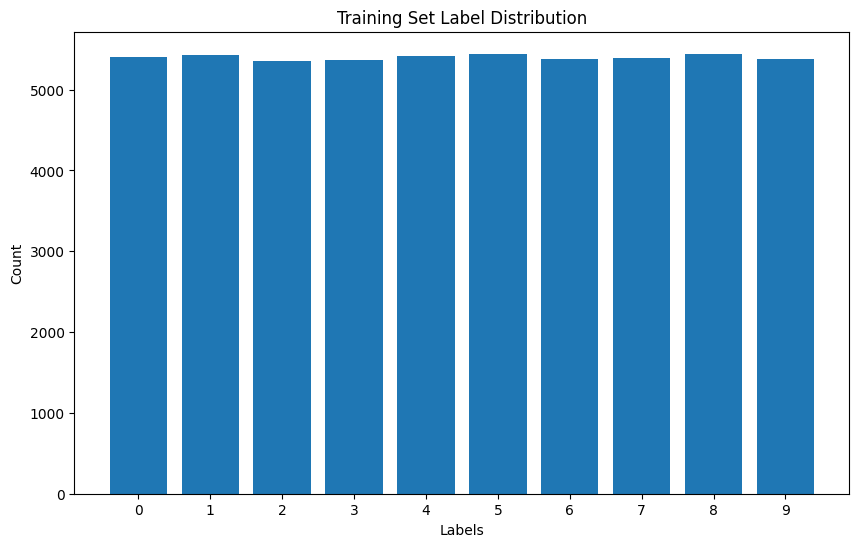

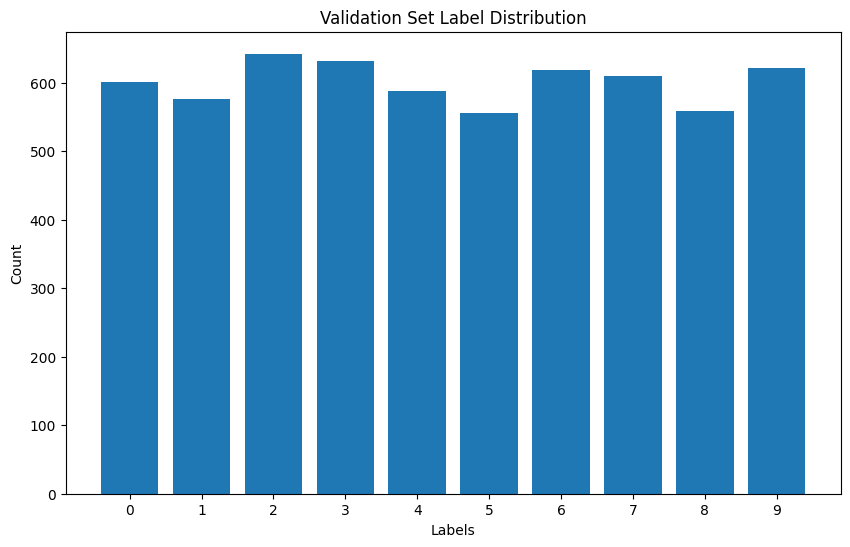

In [5]:
train_labels = np.argmax(y_train, axis=1)
val_labels = np.argmax(y_val, axis=1)

plot_label_distribution(train_labels, 'Training Set Label Distribution')
plot_label_distribution(val_labels, 'Validation Set Label Distribution')


In [5]:
import tensorflow as tf

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=8
)

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(verbose=1,min_lr=0.00000001, patience=3,),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
]

In [12]:
# Define the model architecture
model = tf.keras.Sequential([
    # Input layer
    layers.Input(shape=(28, 28, 1)),


    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),

    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(units=num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mode_history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), callbacks=[callbacks])



Epoch 1/30
844/844 [==============================] - 28s 17ms/step - loss: 0.5994 - accuracy: 0.7866 - val_loss: 0.3660 - val_accuracy: 0.8632 - lr: 0.0010
Epoch 2/30
844/844 [==============================] - 14s 16ms/step - loss: 0.3873 - accuracy: 0.8591 - val_loss: 0.2652 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 3/30
844/844 [==============================] - 14s 16ms/step - loss: 0.3211 - accuracy: 0.8852 - val_loss: 0.2808 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/30
844/844 [==============================] - 14s 17ms/step - loss: 0.2899 - accuracy: 0.8956 - val_loss: 0.2244 - val_accuracy: 0.9175 - lr: 0.0010
Epoch 5/30
844/844 [==============================] - 14s 17ms/step - loss: 0.2658 - accuracy: 0.9045 - val_loss: 0.2150 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 6/30
844/844 [==============================] - 15s 18ms/step - loss: 0.2467 - accuracy: 0.9104 - val_loss: 0.2134 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 7/30
844/844 [==============================] - 14s 

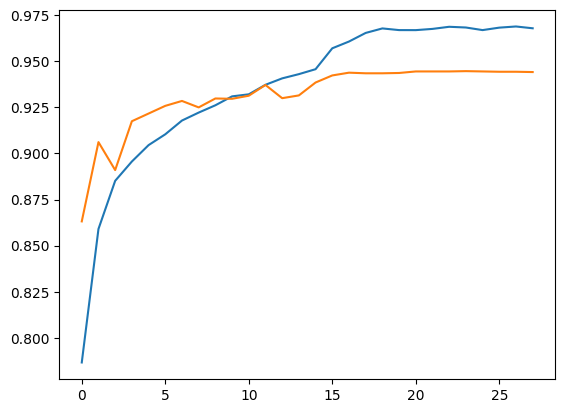

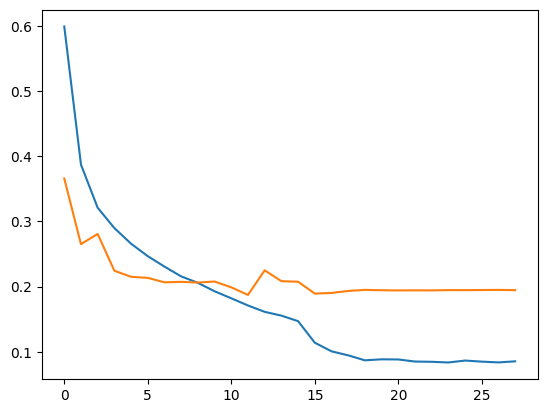

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mode_history.history["accuracy"])
plt.plot(mode_history.history["val_accuracy"])
plt.figure()
plt.plot(mode_history.history["loss"])
plt.plot(mode_history.history["val_loss"])

In [24]:
model.save('../Trained_Models/MNISTFASHION.h5')

In [5]:
model = load_model('../Trained_Models/MNISTFASHION.h5')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 48)        13872     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 48)        20784     
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 48)        20784     
                                                        